# Runtime Setup

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
!pip install open3d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 420.5/420.5 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 84.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 110.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 86.9 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.9.2
    Uninstalling nbformat-5.9.2:
      Successfully uninstalled n

# Path Setup

In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pwd

/content


In [5]:
%cd /content/drive/MyDrive/Food\ Property\ Prediction

/content/drive/MyDrive/Food Property Prediction


In [6]:
!pwd

/content/drive/MyDrive/Food Property Prediction


# Load Dataset

In [ ]:
from src.dataset import FoodPredictionDataset
from matplotlib import pyplot as plt

In [ ]:
food_dataset = FoodPredictionDataset(root_dir="ECUSTFD-resized-", mode="train")

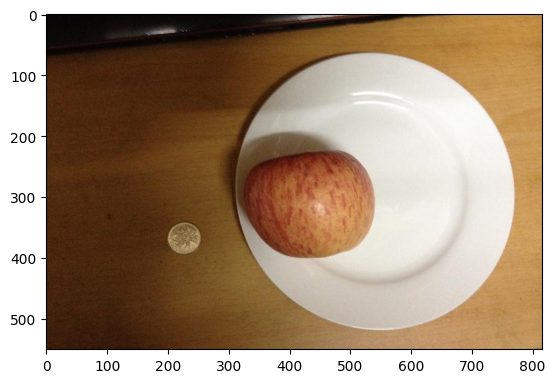

[[326 229]
 [540 401]]
310


In [ ]:
for i in range(len(food_dataset)):
    sample = food_dataset[i]
    plt.imshow(sample['image'])
    plt.show()
    print(sample['landmarks'])
    print(sample['volume'])
    break

# DataLoader

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
dataloader = DataLoader(food_dataset, batch_size=4, shuffle=True, num_workers=0)

In [ ]:
for i_batch, sample_batched in enumerate(dataloader):
    print(sample_batched['volume'])
    break

tensor([210, 170, 420, 210])


# Depth Estimation

In [7]:
import cv2

In [8]:
from matplotlib import pyplot as plt

In [9]:
img = cv2.imread('ECUSTFD-resized-/JPEGImages/apple001S(1).JPG', 3)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [10]:
img.shape

(551, 816, 3)

In [11]:
from src.depth_estimation import DepthEstimation

In [12]:
import torch

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [14]:
depth_estimation = DepthEstimation(device)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/intel-isl/MiDaS/zipball/master" to /root/.cache/torch/hub/master.zip


ModuleNotFoundError: ignored

In [ ]:
out = depth_estimation.predict_map(img)

In [ ]:
plt.imshow(out)
plt.colorbar()
plt.show()